### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Считывание файлов

In [2]:
assessments = pd.read_csv('assessments.csv')

courses = pd.read_csv('courses.csv')

stud_assessment = pd.read_csv('studentAssessment.csv')

stud_reg = pd.read_csv('studentRegistration.csv')

# Часть 1: Разведочный анализ данных

А) Размеры таблиц, типы данных, пропущенне значения, дубликаты

Б) Аномалии в таблицах

## Таблица assessments

In [3]:
assessments.shape

(206, 6)

Размер таблицы

In [4]:
assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

Оценили типы данных, никаких противоречий с описанием колонок нет

In [5]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Имеются пропуски(11) в колонке date; узнаем подробности о них далее

In [6]:
assessments.loc[assessments.duplicated()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight


Дубликатов данных нет

#### Исследование колонок

In [7]:
assessments.code_module.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

7 уникальных предметов

In [8]:
assessments.code_presentation.unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

4 семестра

In [9]:
assessments.assessment_type.unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

Все значения совпадают с описанными

In [10]:
assessments.id_assessment.nunique()

206

Количество тестов совпадает с количеством строк в таблице; это значит, что не возникнет конфликтов, где к одному и тому же тесту приписаны разные даты, веса, тип оценки и т.п.

In [11]:
assessments.date.describe()

count    195.000000
mean     145.005128
std       76.001119
min       12.000000
25%       71.000000
50%      152.000000
75%      222.000000
max      261.000000
Name: date, dtype: float64

Описательные данные по дате укладываются в "логичное" описание: значения положительны, другие характеристики не похожи на аномальные. Количество(195) меньше строк в таблице(206) ровно на 11 пропущенных значений.

Возможно даты некоторых тестов выходят за пределы семестра? Большие максимальные значения выглядят аномально на первый взгляд.
Это было бы логическим противоречием.

In [12]:
assessments.loc[assessments.date.isna()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


Все записи о пропущенных значениях, принадлежат к экзаменам. Возможно, это связано с тем, что итоговая оценка уже высчитана как сумма баллов за тесты в течение семестра. 
Не для всех предметов сюда записаны экзамены.

In [13]:
assessments.weight.describe()

count    206.000000
mean      20.873786
std       30.384224
min        0.000000
25%        0.000000
50%       12.500000
75%       24.250000
max      100.000000
Name: weight, dtype: float64

Есть несколько весов имеющих нулевое значение - значит тест не имеет никакого влияния на итоговую оценку.

In [14]:
assessments.query('weight == 0') \
    .groupby(['code_module', 'code_presentation'], as_index=False) \
    .agg({'assessment_type': 'unique', 'weight': 'count'})

,code_module,code_presentation,assessment_type,weight
0,BBB,2014J,[TMA],1
1,FFF,2013B,[CMA],7
2,FFF,2013J,[CMA],7
3,FFF,2014B,[CMA],7
4,FFF,2014J,[CMA],7
5,GGG,2013J,"[CMA, TMA]",9
6,GGG,2014B,"[CMA, TMA]",9
7,GGG,2014J,"[CMA, TMA]",9


Выше мы видим, что нулевые веса присутствуют по большей части в компьютерной оценке, а также есть в предметах BBB, FFF и GGG

## Таблица courses

In [15]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


Пропущенных значений нет

In [16]:
courses.shape

(22, 3)

Размер таблицы

In [17]:
courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

Типы данных согласуются с описанием

In [18]:
courses.loc[courses.duplicated()]

,code_module,code_presentation,module_presentation_length


Дубликатов нет

In [19]:
courses.code_module.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [20]:
courses.code_presentation.unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

Те же уникальные значения, что и в таблице assessments

In [21]:
courses.module_presentation_length.describe()

count     22.000000
mean     255.545455
std       13.654677
min      234.000000
25%      241.000000
50%      261.500000
75%      268.000000
max      269.000000
Name: module_presentation_length, dtype: float64

Семестры длятся от 234 до 269 дней. Ниже проверим, есть ли тесты выходящие за пределы семестра. Если таковых не будет, то будем считать, что для экзаменов без даты(NaN) датой экзамена является конец семестра.

## Таблица stud_assessment
Этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу

In [22]:
stud_assessment.shape

(173912, 5)

Размер

In [23]:
stud_assessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

Типы данных согласуются с описанием

In [24]:
stud_assessment.loc[stud_assessment.duplicated()]

,id_assessment,id_student,date_submitted,is_banked,score


Повторяющихся строк нет

In [25]:
stud_assessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

В колонке score есть пропущенные значения

#### Исследование колонок

In [26]:
stud_assessment.id_assessment.nunique()

188

188 уникальных тестов(id_assessment), в то время как в таблице assessments их 206;
Похоже, есть тесты, за которые не выставлялись оценки. Выясним позднее, что это за тесты.

In [27]:
stud_assessment.id_student.nunique()

23369

Именно для такого количества уникальных студентов есть записи

In [28]:
stud_assessment.date_submitted.describe()

count    173912.000000
mean        116.032942
std          71.484148
min         -11.000000
25%          51.000000
50%         116.000000
75%         173.000000
max         608.000000
Name: date_submitted, dtype: float64

На данный момент в этой колонке самое большое количество аномалий:

1) Есть отрицательные даты, которые можно трактотавать как сдачу теста до начала семестра

2) Есть даты, превосходящие максимальные даты любого из семестров из таблицы courses. То есть работа отправлена на оценку после окончательной даты сдачи теста и, порой, со значительным опозданием.

In [29]:
stud_assessment.query('date_submitted < 0')

,id_assessment,id_student,date_submitted,is_banked,score
1641,1758,603861,-1,1,61.0
1685,1758,1970390,-1,1,78.0
1690,1758,2073016,-1,1,60.0
1693,1758,2139353,-1,1,65.0
1708,1758,2358969,-1,1,68.0
...,...,...,...,...,...
172516,37440,624767,-1,1,100.0
172526,37440,631446,-1,1,100.0
172717,37441,624767,-1,1,100.0
172727,37441,631446,-1,1,100.0


Мы видим, что среди записей с "отрицательной" датой сдачи, есть записи с перезачетом. Уберем их.

In [30]:
data_anomaly_1 = stud_assessment.query('date_submitted < 0 and is_banked == 0')
# Запишем эти значения. Быть может понадобится дальнейший их анализ

stud_assessment.query('date_submitted < 0 and is_banked == 0')

,id_assessment,id_student,date_submitted,is_banked,score
3309,14984,84245,-4,0,82.0
3349,14984,169515,-5,0,70.0
3550,14984,418325,-3,0,75.0
3897,14984,528698,-4,0,76.0
3906,14984,530065,-3,0,49.0
...,...,...,...,...,...
151325,34905,598540,-2,0,75.0
151743,34905,654834,-1,0,96.0
151867,34905,678954,-1,0,96.0
152497,34905,481240,-5,0,100.0


Без перезачетов получилось совсем немного записей, но что-то содержательно без мерджа с другими таблицами сказать сложно.

Данные, где дата сдачи "велика" по "здравой" логике сейчас анализировать не будем. По условиям задачи, тест будет считаться проваленным, если задание отправлено позже окончательной даты сдачи теста.

In [31]:
stud_assessment.query('is_banked == 1').shape[0]

1909

Столько в таблице записей с перезачтенными тестами. У каждого такого теста дата сдачи равна -1. 

In [32]:
data_anomaly_2 = stud_assessment.loc[stud_assessment.score.isna()]
stud_assessment.loc[stud_assessment.score.isna()]

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


Аналогично, без мерджа с другими таблицами трудно анализировать отсутствие оценки

## Таблица stud_reg
Этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре

In [33]:
stud_reg.shape

(32593, 5)

In [34]:
stud_reg.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [35]:
stud_reg.loc[stud_reg.duplicated()]

,code_module,code_presentation,id_student,date_registration,date_unregistration


Размер: (32593, 5); данные согласуются с описанием; дубликатов нет;

In [36]:
stud_reg.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Есть пропущенные даты регистрации и отмены регистрации. Согласно описанию задания, во втором случае пустые значения обозначают записи о студентах окончивших курс. Кроме того, здесь говорится о записях на курс. Что косвенно может указывать, что курс - это пара предмет и семестр.

"Окончивших курс" - будем считать, что эта фраза означает, что данные студенты продолжили учебу и сдавали экзамены.

Посмотрим 2 последние колонки, так как первые 3 описываются схожим образом с предыдущими таблицами и новых данных не несут

In [37]:
stud_reg.date_registration.describe()

count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

Мы видим, что регистрация на курс происходит как задолго до начала семестра(322 дня), так и в течение семестра, в том числе и на 167 день. Интресно, что при такой регистрации часть тестов в курсе нельзя будет сдать просто потому, что дедлайн уже пройден

In [38]:
stud_reg.date_unregistration.describe()

count    10072.000000
mean        49.757645
std         82.460890
min       -365.000000
25%         -2.000000
50%         27.000000
75%        109.000000
max        444.000000
Name: date_unregistration, dtype: float64

Здесь имеются аномалии: в частности, дата отмены регистрации( за 365 дней до начала курса) превосходит любую даты регистрации.
Кроме того, есть значения, где отмена проводится уже после окончания семестра(444 дня)

In [39]:
stud_reg.loc[stud_reg.date_registration.isna()]

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0
5573,BBB,2014B,614270,NaN,-142.0
6295,BBB,2014B,2409808,NaN,-109.0
6305,BBB,2014B,2439442,NaN,-149.0
8307,BBB,2014J,694001,NaN,-36.0
8975,CCC,2014B,394791,NaN,-61.0


Вместе с отсутствием даты регистрации мы можем встретить и отмену регистрации. Такую ситуацию можно было бы объяснить тем, что при регистрации произошла ошибка. Поэтому, если это не критично для текущей задачи, такие записи мы будем оставлять.

### проверка гипотез о данных

#### 1) 
Может быть есть тесты, которые выходили за пределы семестра???

In [40]:
test_1 = assessments.merge(courses, how='inner', on=['code_module', 'code_presentation'])

In [41]:
test_1[test_1.date > test_1.module_presentation_length]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length


Вывод: таких тестов нет.

А значит при необходимости мы можем поставить в качестве даты экзамена последний день семестра.

#### 2) 
В таблице reg_stud есть записи, где отсутствует и дата регистрации и дата отмены регистрации. Посмотрим, есть ли такие студенты в таблице stud_assessment или же действительно произошла ошибка.

In [42]:
test = stud_reg.loc[stud_reg.date_unregistration.isna()]
# Оставим только тех, у кого пустое значение в дате отмены

test = test.loc[test.date_registration.isna()]
# Из них выберем только тех, у кого по нашему мнению ошибка при регистрации

test.merge(stud_assessment, how='inner', on='id_student')
# Сделаем мердж с фалом stud_assessment

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score


Вывод: пара пропущенных значений даты регистрации и ее отмены не пересекается с файлом оценок.

# Часть 2: Понятие курса

## 1)Уникальный идентификационный номер
Название предмета( AAA) и код семестра (2013J) образуют пару, которая однозначно говорит какой курс проходит

Файл courses также говорит нам, что всего было 22 курса. 






In [43]:
assessments.groupby(['code_module', 'code_presentation'], as_index=False) \
    .agg({'id_assessment': 'count'}).shape[0]

22

## 2) Распределение студентов

Файлы assessments и stud_reg связаны через те же колонки, что рассматривались в первом пункте(code_module, code_presentation). В файле stud_reg также отображается уникальный номер студента(id_student)
и данные о дате его регистрации(date_registration) и отказе от регистрации на курс(date_unregistration).

In [44]:
stud_reg.groupby(['code_module', 'code_presentation'], as_index=False).id_student.count()

# Здесь мы видим сколько студентов изначально регистрировались на каждый курс и количество курсов.

,code_module,code_presentation,id_student
0,AAA,2013J,383
1,AAA,2014J,365
2,BBB,2013B,1767
3,BBB,2013J,2237
4,BBB,2014B,1613
5,BBB,2014J,2292
6,CCC,2014B,1936
7,CCC,2014J,2498
8,DDD,2013B,1303
9,DDD,2013J,1938


## 3) Факт сдачи экзамена
Оценки студентов располагаются в файле stud_assessment. Он связан с файлом assessments через номер теста(id_assessment), 
а с файлом stud_reg через уникальный номер студента(id_student). 


А) Изначально мы видели, что в оценках студентов меньше уникальных id_assessment, чем представлено в файле assessments.
Это наводит на мысли, что есть тесты, которые пропущены. Выясним, что это за тесты.

Б) Все веса промежуточных тестов в сумме дают 100%. Посмотрим равна ли сумма весов по каждой паре (предмет, семестр) 100.

А)

In [45]:
all_assessments = stud_assessment.groupby('id_assessment', as_index=False) \
    .agg({'id_student': 'count'}) \
    .rename(columns={'id_student': 'number_of_students'})
# Берем все тесты, имеющиеся в табличке с оценками студентов

test_2 = assessments.merge(all_assessments, how='left', on='id_assessment')
# Мерджим с файлом assessments

ind = test_2.index[test_2.number_of_students.isna()].to_list()
# Берем индексы тех записей, которых нет в табличке с оценками

Выводим те записи, для которых нет оценок. Это все сплошь экзамены

In [46]:
test_2.loc[test_2.number_of_students.isna()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,number_of_students
5,AAA,2013J,1757,Exam,NaN,100.0,NaN
11,AAA,2014J,1763,Exam,NaN,100.0,NaN
23,BBB,2013B,14990,Exam,NaN,100.0,NaN
35,BBB,2013J,15002,Exam,NaN,100.0,NaN
47,BBB,2014B,15014,Exam,NaN,100.0,NaN
53,BBB,2014J,15025,Exam,NaN,100.0,NaN
63,CCC,2014B,40087,Exam,NaN,100.0,NaN
73,CCC,2014J,40088,Exam,NaN,100.0,NaN
113,EEE,2013J,30713,Exam,235.0,100.0,NaN
118,EEE,2014B,30718,Exam,228.0,100.0,NaN


Оставляем только те экзамены, за которые в файле есть оценка

In [47]:
exam_all = assessments.query('assessment_type == "Exam"')
exam_all.drop(index=ind)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
87,DDD,2013B,25340,Exam,240.0,100.0
94,DDD,2013J,25354,Exam,261.0,100.0
101,DDD,2014B,25361,Exam,241.0,100.0
108,DDD,2014J,25368,Exam,NaN,100.0


### Вывод А: 
Среди всех предметов, только предметы CCC и DDD имеют оценку в виде экзамена. По остальным 5 предметам оценка производится иначе.
По каждому из них зачет получается посредством промежуточных оценок преподавателя(TMA) и/или 
компьютерных оценок(CMA).

Б)

In [48]:
assessments.query('assessment_type != "Exam"') \
    .groupby(['code_module', 'code_presentation'], as_index=False) \
    .weight.sum()
# Исключаем все записи с экзаменами и агрегируем нужную информацию

,code_module,code_presentation,weight
0,AAA,2013J,100.0
1,AAA,2014J,100.0
2,BBB,2013B,100.0
3,BBB,2013J,100.0
4,BBB,2014B,100.0
5,BBB,2014J,100.0
6,CCC,2014B,100.0
7,CCC,2014J,100.0
8,DDD,2013B,100.0
9,DDD,2013J,100.0


### Вывод Б:
Все предметы кроме GGG имеют сумму весов тестов равную 100. По предмету GGG к тому же нет и экзаменационных оценок. 


## Курс 
- пара: предмет(code_module), семестр(code_presentation). Для его сдачи необходимо набрать 40 баллов и более за экзамен.


# Задачи

## Задача 1

Сколько студентов успешно сдали только один курс? 

In [49]:
codes = ['CCC', 'DDD']
# Ранее было показано, что только по этим предметам сдавались экзамены

df_1 = assessments.query('assessment_type == "Exam" and code_module in @codes')
# Отбираем только экзамены, по которым проводилась оценка

In [50]:
# Мердж с файлом, где содержатся оценки студентов
df_1 = df_1.merge(stud_assessment, how='inner', on='id_assessment')


In [51]:
df_1.query('score>=40') \
    .groupby('id_student', as_index=False) \
    .agg({'score': 'count'}) \
    .rename(columns={'score': 'completed_courses'}) \
    .query('completed_courses == 1')
# 1 Экзамен - это тоже тест, а значит он будет сдан, если набрано 40 и более баллов
# 3 Для каждого студента посчитаем количество оценок(уже отобранных)
# 5 Отберем только те записи, где сдан 1 экзамен

,id_student,completed_courses
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


Количество строк в данном случае равно количеству студентов сдавших только 1 курс
### Ответ: 
3802 студента сдали только 1 курс

## Задача 2

Выяви самый сложный и самый простой экзамен. 

In [52]:
# Воспользуемся датафреймом из первого задания и добавим колонку, которая будет говорить нам сдан экзамен или нет
df_2 = df_1.assign(exam_is_passed=df_1.score >= 40)

In [53]:
answer_2 = df_2.groupby(['code_module', 'code_presentation'], as_index=False) \
    .agg({'exam_is_passed': ['sum', 'count']}) \
    .rename(columns={'sum': 'successful_attempts', 'count': 'all_attempts'})
# Сумма по колонке exam_is_passed даст количество сданных экзаменов, 
# а вторая агрегатная функция подсчитает вообще все попытки

In [54]:
(answer_2.assign(success_rate=round(answer_2.exam_is_passed['successful_attempts'] / 
                                    answer_2.exam_is_passed['all_attempts'] * 100, 1)) \
    .sort_values('success_rate', ascending=False))
# Колонка success_rate и есть искомая завершаемость( в %)

code_module code_presentation      exam_is_passed              success_rate
                                successful_attempts all_attempts             
4         DDD             2014B                 485          524         92.6
3         DDD             2013J                 878          968         90.7
0         CCC             2014B                 664          747         88.9
5         DDD             2014J                 842          950         88.6
1         CCC             2014J                1019         1168         87.2
2         DDD             2013B                 504          602         83.7

### Ответ:
Самый сложный экзамен на курсе DDD 2013B - завершаемость 83.7 %;

самый простой экзамен на курсе DDD 2014B - завершаемость 92.6 %.

## Задача 3

 По каждому предмету определи средний срок сдачи экзаменов(под сдачей понимаем последнее успешное прохождение экзамена студентом)

In [55]:
df_1.query('score>=40') \
    .groupby(['code_module', 'id_student'], as_index=False) \
    .agg({'date_submitted': 'max'}) \
    .groupby('code_module', as_index=False) \
    .date_submitted.mean().round()
# 1 так отбираем именно успешные прохождения экзамена
# 3 здесь отбирается последняя успешная попытка
# 5 считаем средний срок сдачи предмета

,code_module,date_submitted
0,CCC,239.0
1,DDD,238.0


### Ответ:
Предмет CCC в среднем сдается на 239 день,

а предмет DDD на 238 от начала семестра.

## Задача 4

Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3)

Будем анализировать таблицу с регистрациями, там есть вся необходимая нам информация

А) Самые популярные по количеству регистраций

Вспоминаем, что у нас имеются пропуски в дате регистрации и пропуски в дате отмены. При этом пропущенные значения в дате регистрации могут сочетаться и с отменой регистрации, что может говорить об ошибке при регистрации. Ниже пример.

In [56]:
stud_reg.loc[stud_reg.date_registration.isna()].head(3)

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0


Если есть дата отмены регистрации, будем считать, что есть и регистрация. Заполним пропуски. Так как в задании нам не важны конкрентые даты, будем считать, что регистрация и отмена прошли в один день.

In [57]:
df_4_A = stud_reg[['code_module', 'id_student']]
# Добавим в df не только предмет, но и id_student,
# так как еще во время анализа изначальных таблиц мы выяснили, что уникальных студентов меньше, чем записей в таблице

df_4_A = df_4_A.assign(date_registration=stud_reg.date_registration.fillna(stud_reg.date_unregistration)) \
    .dropna(subset=['date_registration'])
# заполнили пропуски, где было возможно и удалили строки, где даты регистрации все же нет.

Теперь датафрейм для задания таков, что в нем все записи имеют дату регистрации, а значит можно провести группировку по предмету и найти количество уникальных студентов для каждого предмета.

Данный датафрейм нам понадобится еще и для второй половины задания.

In [58]:
df_4_A = df_4_A.groupby('code_module', as_index=False) \
    .agg({'id_student': 'nunique'}) \
    .rename(columns={'id_student': 'registrations'})

In [59]:
df_4_A.sort_values('registrations', ascending=False) \
    .head(3)

,code_module,registrations
1,BBB,7691
5,FFF,7396
3,DDD,5846


### Ответ:

Самые популярные предметы по количеству регистраций в порядке убывания: BBB, FFF, DDD.

Б) Предметы с самым больши оттоком

Отток - отношение количества отменивших регистрацию к общему количеству зарегистрированных. Все записи, где есть отмена регистрации, являются искомыми. Зарегистрированных возьмем смерджив с файлом из первой части задания.

Далее проделываем те же операции, что и в первом случае

In [60]:
df_4_B = stud_reg[['code_module', 'id_student', 'date_unregistration']].dropna(subset=['date_unregistration'])

In [61]:
df_4_B = df_4_B.groupby('code_module', as_index=False) \
    .agg({'id_student': 'nunique'}) \
    .rename(columns={'id_student': 'cancellations'})

In [62]:
answer_4_B = df_4_B.merge(df_4_A, how='inner', on='code_module')
# Объединим df с регистрациями и отменами, чтобы потом посчитать отток

In [63]:
answer_4_B.assign(churn_rate=round(answer_4_B.cancellations / answer_4_B.registrations * 100, 1)) \
    .sort_values('churn_rate', ascending=False)

,code_module,cancellations,registrations,churn_rate
2,CCC,1858,4250,43.7
3,DDD,2065,5846,35.3
5,FFF,2249,7396,30.4
1,BBB,2314,7691,30.1
4,EEE,693,2859,24.2
0,AAA,116,712,16.3
6,GGG,287,2525,11.4


### Ответ:

Предметы с самым большим оттоком, в порядке убывания: CCC, DDD, FFF.

## Задача 5

В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов

А) 

Чтобы посмотреть завершаемость внутри семестра мы возьмем все успешные экзамены внутри него и поделим на все попытки сдачи за этот период

У нас уже имеется готовый датафрейм из второго задания(df_2)

In [64]:
answer_5_A = df_2.groupby(['code_presentation'], as_index=False) \
    .agg({'exam_is_passed': ['sum', 'count']}) \
    .rename(columns={'sum': 'successful_attempts', 'count': 'all_attempts'})
# Проделываем ровно те же действия, что и во втором задании, только агрегацию на данный момент ведем по семестру

In [65]:
answer_5_A.assign(term_success_rate=round(answer_5_A.exam_is_passed['successful_attempts'] / answer_5_A.exam_is_passed['all_attempts'] * 100, 1)) \
    .sort_values('term_success_rate', ascending=False)

code_presentation      exam_is_passed              term_success_rate
                    successful_attempts all_attempts                  
1             2013J                 878          968              90.7
2             2014B                1149         1271              90.4
3             2014J                1861         2118              87.9
0             2013B                 504          602              83.7

### Ответ:
Самая низкая завершаемость курсов(в %) была в семестре 2013B

Б) Эту часть задания мы будем решать аналогично заданию 3, но группировать будем не по предмету, а по семестру

In [66]:
df_1.query('score>=40')\
    .groupby(['code_presentation', 'id_student'], as_index=False)\
    .agg({'date_submitted': 'max'})\
    .groupby('code_presentation', as_index=False)\
    .date_submitted.mean().round()\
    .sort_values('date_submitted', ascending=False)

,code_presentation,date_submitted
3,2014J,244.0
1,2013J,240.0
2,2014B,233.0
0,2013B,230.0


### Ответ:

Самый долгие средние сроки сдачи экзаменов имеет семестр 2014J

## Задача 6



Сделать RFM- кластеризацию. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров

Будем использовать датафрейм сформированный во втором задании как основу.

In [67]:
exams = df_2[['id_student', 'date_submitted', 'score', 'exam_is_passed']]

In [68]:
# Описываем агрегатные функции для каждого сегмента
agg_func = {
    'date_submitted': 'mean',                        # Recency
    'exam_is_passed': lambda x: x.sum() / x.count(), # Frequency
    'score': 'mean'                                  # Monetary
}

rfm = exams.groupby('id_student') \
    .agg(agg_func).reset_index()
# Записываем результаты агрегации в новый df

rfm.rename(columns={'date_submitted': 'Recency', 'exam_is_passed': 'Frequency',
    'score': 'Monetary'}, inplace=True)
# Переименуем колонки

Изучим изменчивость полученных переменных

In [69]:
rfm.describe()

,id_student,Recency,Frequency,Monetary
count,4.633000e+03,4633.000000,4633.000000,4633.000000
mean,7.256904e+05,238.462227,0.881286,65.117958
std,5.753498e+05,5.653378,0.321142,20.470561
min,2.369800e+04,229.000000,0.000000,0.000000
25%,5.011580e+05,234.000000,1.000000,50.000000
50%,5.884820e+05,241.000000,1.000000,66.000000
75%,6.463510e+05,243.000000,1.000000,82.000000
max,2.698251e+06,285.000000,1.000000,100.000000


Только Recency и Monetary, по типу распределения подходят для того, чтобы разбивать их на сегменты с помощью квантилей. У переменной Frequency подавляющая часть данных равна значению 1.0. Ее следует изучить отдельно.

Кроме того, мы помним, что у части экзаменов не было окончательной даты сдачи экзаменов. Должно быть отсюда появляется значение 285 дней в колонке Recency, которое выходит за пределы любого семестра. Тем не менее, в условии этого задания подобное ограничение не оговаривалось.

In [70]:
rfm.Frequency.unique()

array([1. , 0. , 0.5])

Frequency принимает лишь три значения, их мы и будем использовать во время сегментации. Где 1.0 будет обозначаться максимальной оценкой, а 0 - минимальной.

Мы будем пользоваться функцией cut() для разбиения на сегменты внутри метрик. Для начала возьмем все необходимые квантили, включая нулевой и сотый. Функция cut() не включает левую границу интервала, но включает правую. Поэтому, когда из полученных квантилей мы получим интервалы для разбиения, неучтенным окажется минимальное значение - нулевой квантиль.

Поэтому в сформированном списке первое значение(нулевой квантиль) мы убавим на единицу

In [71]:
quintiles = rfm[['Recency', 'Monetary']].quantile([0., .2, .4, .6, .8, 1.0])

recency_criteria = quintiles['Recency'].to_list()
recency_criteria.insert(0, recency_criteria.pop(0) - 1)

monetary_criteria = quintiles['Monetary'].to_list()
monetary_criteria.insert(0, monetary_criteria.pop(0) - 1)
quintiles

,Recency,Monetary
0.0,229.0,0.0
0.2,231.0,46.2
0.4,237.0,60.0
0.6,242.0,72.0
0.8,243.5,84.0
1.0,285.0,100.0


Изначально, мы видим, что 20 квантиль по количеству баллов за экзамен(Monetary) превышает пороговое значение в 40 пунктов. Заменим значение квантиля на значение 39.9, чтобы у нас было разбиение и по пороговому баллу

In [72]:
monetary_criteria.pop(1)
monetary_criteria.insert(1, 39.9)

Разберем способ задания категорий

Recency: Чем меньше среднее время сдачи, тем больше оценку получает студент и наоборот.

Frequency: Если у студента завершаемость равна 0 - он получает оценку 1; при завершаемости 0,5 оценка 2 и при стопроцентной завершаемости оценка 3.

Monetary: Чем выше среднее количество баллов за экзамен, тем выше оценка. В первый сегмент войдут значения от нуля до 39.9 - то есть все студенты, которые в среднем не сдают экзамен

In [73]:
# Создаем столбцы с категориальной оценкой
rfm['R'] = pd.cut(rfm['Recency'], recency_criteria, labels=[5, 4, 3, 2, 1])
rfm['F'] = pd.cut(rfm['Frequency'], [-1, 0, 0.5, 1], labels=[1, 2, 3])
rfm['M'] = pd.cut(rfm['Monetary'], monetary_criteria, labels=[1, 2, 3, 4, 5])

In [74]:
# Комбинируем значения категориальных оценок
rfm['RFM_score'] = rfm['R'].astype('str') + rfm['F'].astype('str') + rfm['M'].astype('str')

## Визуализация сегментов и их сочетаний

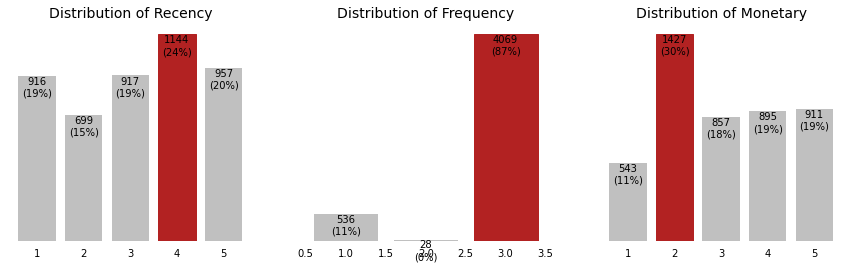

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, p in enumerate(['R', 'F', 'M']):
    parameters = {'R': 'Recency', 'F': 'Frequency', 'M': 'Monetary'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]), fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='black')

plt.show()

Выше мы можем увидеть распределение трех основных метрик

1) Recency: наиболее часто встречаются студенты, которые попадают в сегмент 4. То есть сдают экзамен в промежутке (231, 237] дней. Студенты скорее спешат сдать экзамен, а доля затянувших со сдачей и опоздавших(1 сегмент) составляет 19%.

2) Frequency: Студентов, которые не сдают экзамены вообще 11%, тех, кто сдает экзамен в половине случаев меньше 1 процента, остальные сдают 100% экзаменов. Здесь важно отметить, что наши данные ограничены двумя предметами и 4 семестрами, а также пороговое значение для экзамена всего лишь 40 баллов из 100. Но в условиях задания мы можем сказать, что у нас собралась отличная группа студентов.

3) Monetary: Сегмент 1 - студенты, не набирающие в среднем проходной балл составляют 11% от общего числа. Надо сказать, что если твой средний балл меньше проходного ты либо не сдаешь вообще экзаменов, либо сдаешь их малую часть. Думаю, что близость значений первых сегментов во Frequency и Monetary не случайна и мы убедимся в этом далее. Самый многочисленный сегмент(2) выделяется значительно на фоне других. В него попадают студенты, имеющие среднимй балл от 40 до 60. Для нашего учебного заведения это повод задуматься, что самая многочисленная из "сдающих" групп примыкает к пороговой зоне в 40 баллов. 

Но и здесь следует сделать оговорку. Мы намеренно сместили границу 2 сегмента вниз, а ведь 20 процентиль был на отментке в 46 баллов. И само распределение оценок внутри второго сегмента мы не смотрели

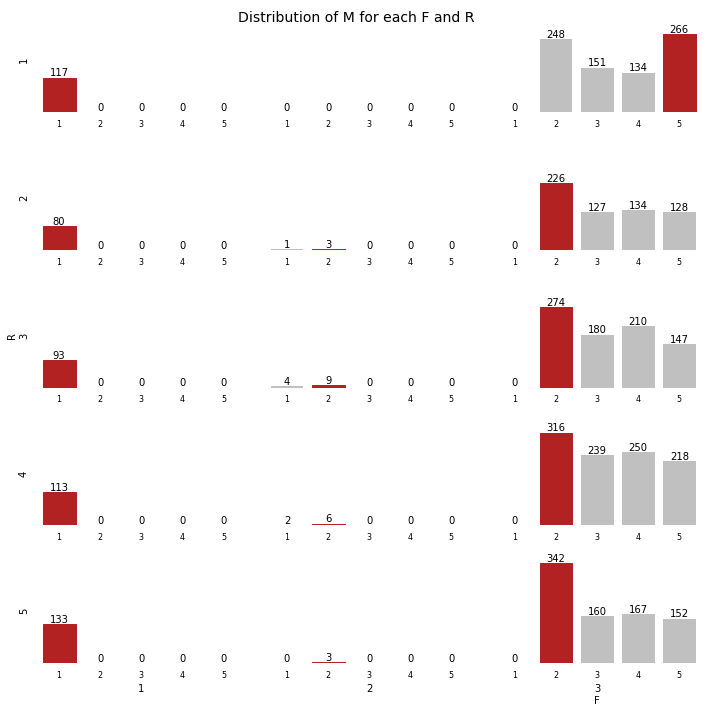

In [76]:
fig, axes = plt.subplots(nrows=5, ncols=3,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 4)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)
        
        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
            
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

Увидим распредление среднего балла внутри  сочетаний дат сдачи(R) и завершаемости(F).

1) Начнем с наименее малочисленного сегмента метрики F( номер 2), где студенты сдают половину экзаменов. Вне зависимости от срока сдачи, средний балл либо меньше порогового(сегмент 1), либо около порогового значения( сегмент 2).

2) Далее поговорим о студентах, которые не сдают экзамены. Все они имеют средний балл ниже порогового значения, что и следует из определения (не)успешного экзамена.

3) Студенты, сдающие все экзамены. В первый раз мы видим довольно интересные данные: не важно когда ты сдаешь экзамен - среди первых или ближе к середине. Самый распространенный средний балл будет между 40 и 60. Но, если ты сдаешь экзамен в числе затягивающих или опоздавших, у тебя будет больше всего отличников( от 84 до 100 баллов в среднем за экзамен)